In [1]:
# 필요한 패키지 설치 및 임포트
!pip install imbalanced-learn==0.7.0
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

     -------------------------------------- 167.1/167.1 kB 5.1 MB/s eta 0:00:00


In [3]:
# 데이터 불러오기
df = pd.read_csv("Social_Network_Ads.csv")

# 데이터 샘플 확인
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# 각 컬럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


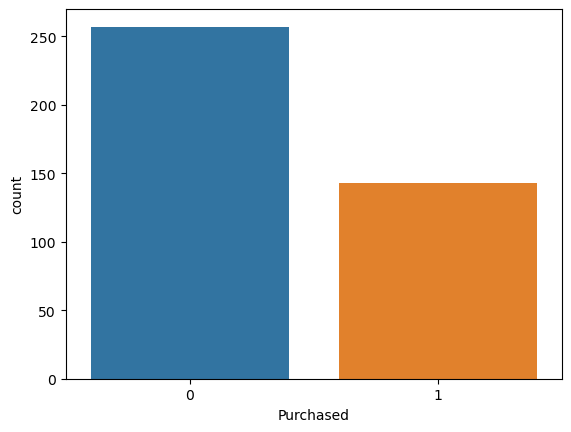

In [5]:
# Purchased 칼럼 클래스 분포 시각화

sns.countplot(x="Purchased", data=df)

plt.show()

In [6]:
# Gender 컬럼 가변수 처리

df_d = pd.get_dummies(df['Gender'])

df2 = pd.merge(df.drop(['Gender'], axis=1), df_d['Male'], left_index=True, right_index=True, how="inner")

df2.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [ ]:
# 데이터셋 학습셋, 테스트셋 분리

X = df2.drop